<a href="https://colab.research.google.com/github/Andyqballer/HomeWork6-Ml/blob/main/HomeWork6Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part a: Single Hidden Layer Neural Network


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Single Layer NN Results:
Training Time: 10.96 seconds
Training Loss: 0.0334
Validation Accuracy: 0.9649
Epochs Trained: 66

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Part b: Multi-Layer Neural Network
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Multi-Layer NN Results:
Training Time: 3.66 seconds
Training Loss: 0.0180
Validation Accuracy: 0.9737
Epochs Trained: 21

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97     

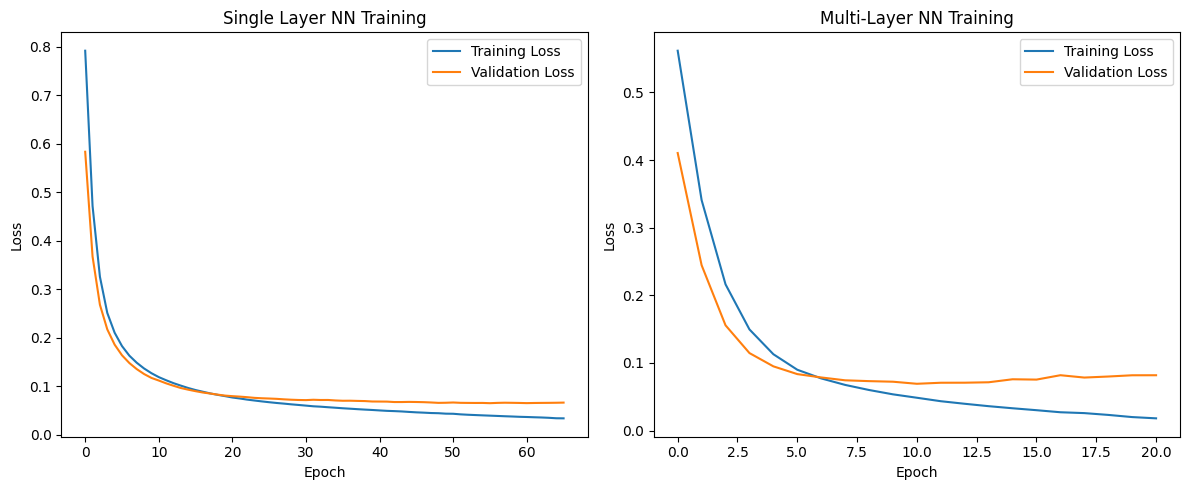

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import time
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer Wisconsin dataset
breast = load_breast_cancer()
breast_data = breast.data
breast_target = breast.target

# Preprocess the data
def preprocess_data(X, y):
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    return X_train_scaled, X_val_scaled, y_train, y_val

# Single Hidden Layer Neural Network
def build_single_layer_nn():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(30,)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


def build_multi_layer_nn():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(30,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


def train_and_evaluate_model(model, X_train, X_val, y_train, y_val, epochs=100):
    start_time = time.time()

    # Train the model with early stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Fit the model and store history
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=0
    )

    end_time = time.time()
    training_time = end_time - start_time

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

    # Predictions for detailed metrics
    y_pred = (model.predict(X_val) > 0.5).astype(int)

    return {
        'training_time': training_time,
        'training_loss': history.history['loss'][-1],
        'validation_loss': val_loss,
        'validation_accuracy': val_accuracy,
        'classification_report': classification_report(y_val, y_pred),
        'epochs_trained': len(history.history['loss']),
        'history': history
    }

# Main execution
def main():
    # Preprocess data
    X_train, X_val, y_train, y_val = preprocess_data(breast_data, breast_target)

    print("Part a: Single Hidden Layer Neural Network")
    # Single Layer Neural Network
    single_layer_model = build_single_layer_nn()
    single_layer_results = train_and_evaluate_model(
        single_layer_model, X_train, X_val, y_train, y_val
    )

    print("\nSingle Layer NN Results:")
    print(f"Training Time: {single_layer_results['training_time']:.2f} seconds")
    print(f"Training Loss: {single_layer_results['training_loss']:.4f}")
    print(f"Validation Accuracy: {single_layer_results['validation_accuracy']:.4f}")
    print(f"Epochs Trained: {single_layer_results['epochs_trained']}")
    print("\nClassification Report:")
    print(single_layer_results['classification_report'])

    print("\n\nPart b: Multi-Layer Neural Network")
    # Multi-Layer Neural Network
    multi_layer_model = build_multi_layer_nn()
    multi_layer_results = train_and_evaluate_model(
        multi_layer_model, X_train, X_val, y_train, y_val
    )

    print("\nMulti-Layer NN Results:")
    print(f"Training Time: {multi_layer_results['training_time']:.2f} seconds")
    print(f"Training Loss: {multi_layer_results['training_loss']:.4f}")
    print(f"Validation Accuracy: {multi_layer_results['validation_accuracy']:.4f}")
    print(f"Epochs Trained: {multi_layer_results['epochs_trained']}")
    print("\nClassification Report:")
    print(multi_layer_results['classification_report'])

    # Visualize Training Process
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.title('Single Layer NN Training')
    plt.plot(single_layer_results['history'].history['loss'], label='Training Loss')
    plt.plot(single_layer_results['history'].history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('Multi-Layer NN Training')
    plt.plot(multi_layer_results['history'].history['loss'], label='Training Loss')
    plt.plot(multi_layer_results['history'].history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()